In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import scipy.stats as stats
import pickle

sns.set(style="ticks", context='poster', font_scale=0.9)
%matplotlib inline

RANDOM_SEED = 8927

In [2]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Thu Sep 19 2024

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.27.0

matplotlib: 3.8.1
pandas    : 2.2.2
seaborn   : 0.13.2
scipy     : 1.11.3
numpy     : 1.25.2
pymc      : 5.9.1
arviz     : 0.19.0

Watermark: 2.4.3



# Main figures

## Figure 1D

In [3]:
LTEI_ctrl = pd.read_excel('./raw_data/control_LTEI.xlsx', index_col=0)

In [5]:
file = open("./stat_inf/control_LTEI_HM_comp.pickle",'rb')
stat_inf = pickle.load(file)

In [8]:
df_novo = pd.read_excel("./raw_data/novo_LTEI.xlsx", index_col=0)
df_novo2 = pd.read_excel("./raw_data/novo_LTEI_2.xlsx", index_col=0)

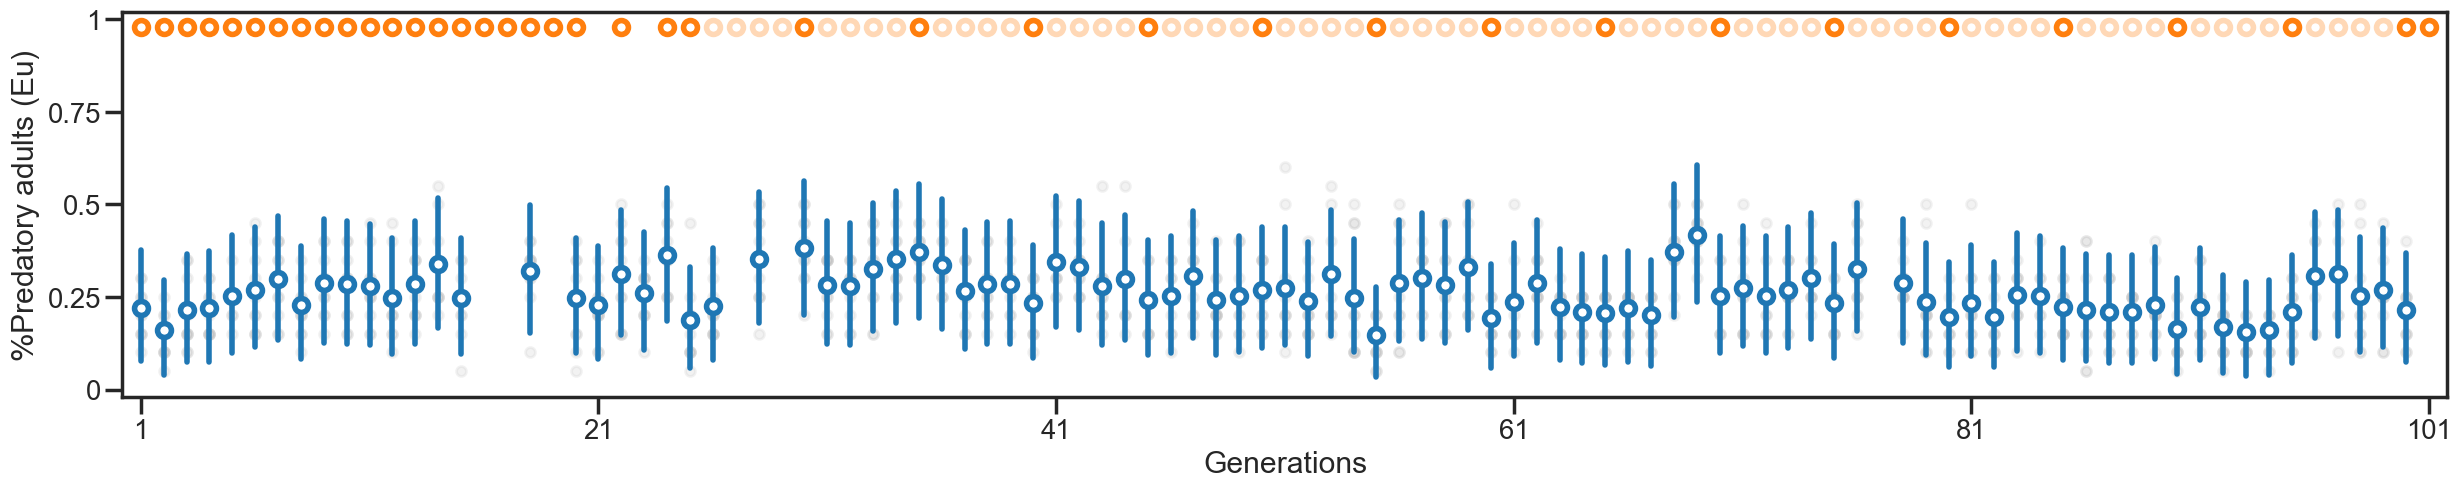

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(30,5))

col=sns.color_palette("tab10")[1]
for i in df_novo2.columns:
    plt.scatter(int(i[1:]), 0.98, s=100, edgecolors=col, color='white', alpha=0.3, linewidths=4, zorder=4)

for i in df_novo.columns:
    plt.scatter(int(i[1:]), 0.98, s=100, edgecolors=col, color='white', linewidths=4, zorder=4)
    
col=sns.color_palette("tab10")[0]
count = 1
hdi_list = []
for i in LTEI_ctrl.columns:
    inf_summ = az.summary(stat_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    hdi_list.append((np.mean(l_hdi), np.mean(h_hdi)))
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=100, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(LTEI_ctrl[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=1)
    count += 1

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.02, 1.02), xticks=np.linspace(1, 101, 6), xlim=(0.2, 101.8), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);


## Figure 1E

In [12]:
df_f15 = pd.read_excel("./raw_data/F15_reversal.xlsx", index_col=0)

In [14]:
file = open("./stat_inf/R15_HM.pickle",'rb')
stat_inf_R15 = pickle.load(file)

''

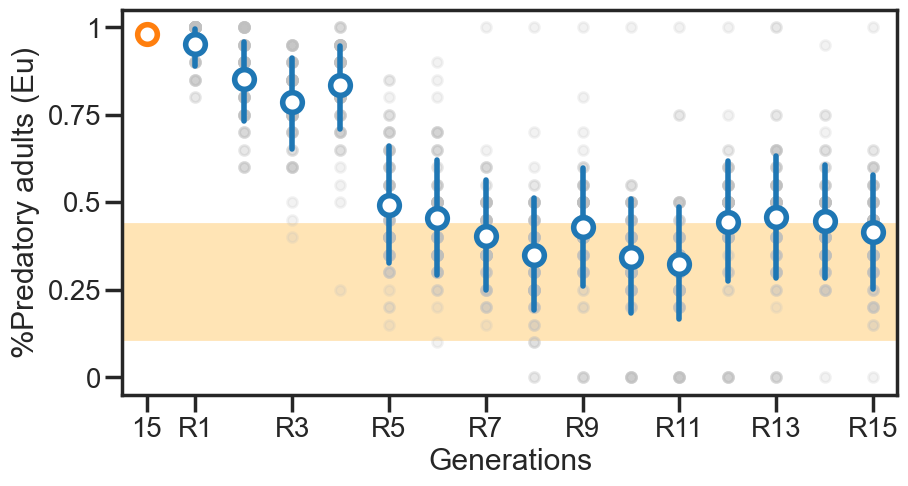

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

col=sns.color_palette("tab10")[0]

plt.scatter(0, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f15.columns:
    inf_summ = az.summary(stat_inf_R15[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f15[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([0.,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), xticklabels=['15'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-0.5, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])
;

## Figure 1F

In [16]:
df_f25 = pd.read_excel("./raw_data/F25_reversal.xlsx", index_col=0)
file = open("./stat_inf/R25_HM.pickle",'rb')
stat_inf_R25 = pickle.load(file)

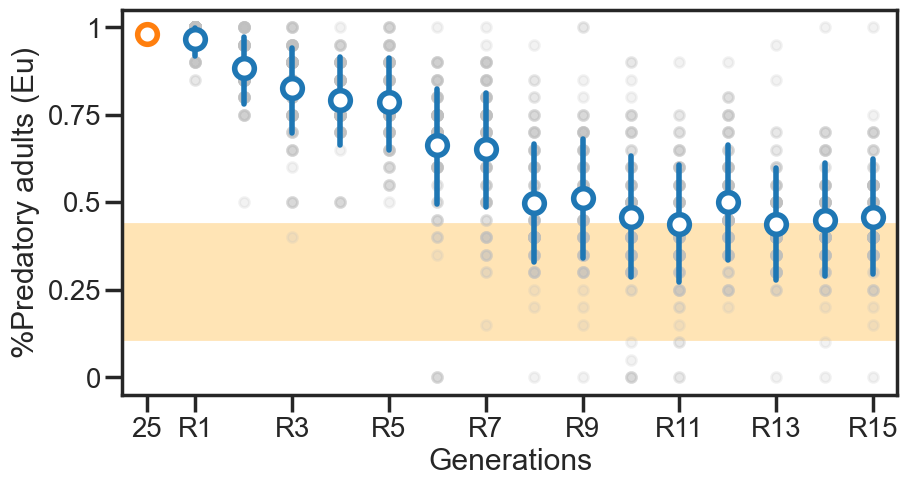

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

col=sns.color_palette("tab10")[0]

plt.scatter(0, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f25.columns:
    inf_summ = az.summary(stat_inf_R25[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f25[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)



ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([0.,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), xticklabels=['25'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-0.5, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2B

In [18]:
df_R1 = pd.read_excel("./raw_data/F1Rev.xlsx", index_col=0)

In [20]:
file = open("./stat_inf/R1_HM.pickle",'rb')
df_R1_inf = pickle.load(file)

''

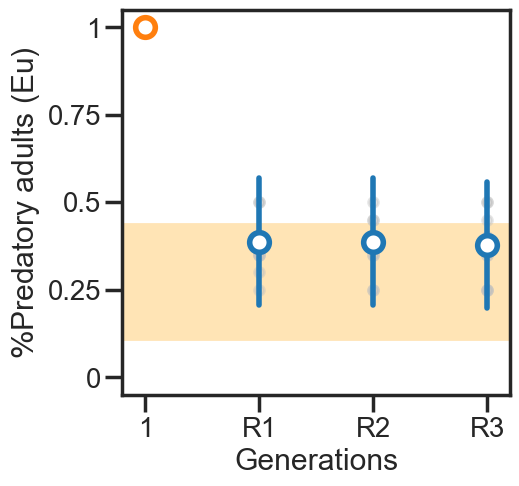

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

col=sns.color_palette("tab10")[0]


for i in df_R1.columns:
    if int(i[1:]) ==1:
        y = np.array(df_R1[i])/20.
        plt.scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R1_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R1[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 4, 4), xticklabels=[1, 'R1', 'R2', 'R3'], xlim=(0.8, 4.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])
;

## Figure 2C

In [24]:
df_R2 = pd.read_excel("./raw_data/F2Rev.xlsx", index_col=0)
file = open("./stat_inf/R2_HM.pickle",'rb')
df_R2_inf = pickle.load(file)

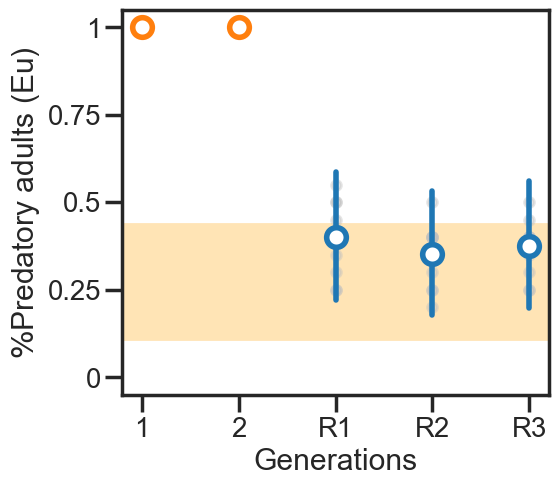

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))

col=sns.color_palette("tab10")[0]


for i in df_R2.columns:
    if int(i[1:]) <= 2:
        y = np.array(df_R2[i])/20.
        plt.scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R2_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R2[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 5, 5), xticklabels=[1, 2, 'R1', 'R2', 'R3'], xlim=(0.8, 5.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2D

In [26]:
df_R3 = pd.read_excel("./raw_data/F3Rev.xlsx", index_col=0)
file = open("./stat_inf/R3_HM.pickle",'rb')
df_R3_inf = pickle.load(file)

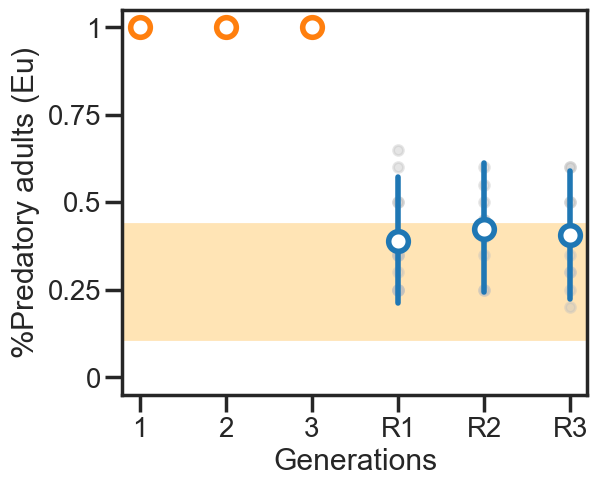

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

col=sns.color_palette("tab10")[0]


for i in df_R3.columns:
    if int(i[1:]) <= 3:
        y = np.array(df_R3[i])/20.
        plt.scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R3_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R3[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 6, 6), xticklabels=[1, 2, 3, 'R1', 'R2', 'R3'],  xlim=(0.8, 6.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2E

In [28]:
df_R4 = pd.read_excel("./raw_data/F4Rev.xlsx", index_col=0)
file = open("./stat_inf/R4_HM.pickle",'rb')
df_R4_inf = pickle.load(file)

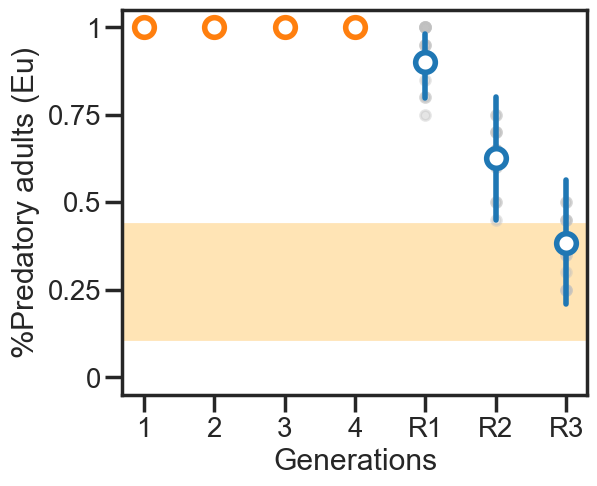

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

col=sns.color_palette("tab10")[0]


for i in df_R4.columns:
    if int(i[1:]) <= 4:
        y = np.array(df_R4[i])/20.
        plt.scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R4_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R4[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 7, 7), xticklabels=[1, 2, 3, 4, 'R1', 'R2', 'R3'], xlim=(0.7, 7.3), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2F

In [30]:
df_R5 = pd.read_excel("./raw_data/F5Rev.xlsx", index_col=0)
file = open("./stat_inf/R5_HM.pickle",'rb')
df_R5_inf = pickle.load(file)

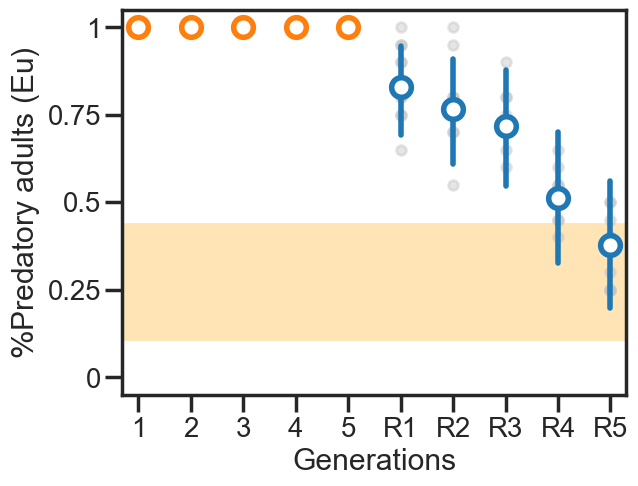

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6.5,5))

col=sns.color_palette("tab10")[0]


for i in df_R5.columns:
    if int(i[1:]) <= 5:
        y = np.array(df_R5[i])/20.
        plt.scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R5_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R5[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)


col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 10, 10), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'], xlim=(0.7, 10.3), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3C

In [38]:
WT_F5Rev = pd.read_excel("./raw_data/WT_F5Rev.xlsx", index_col=0)
file = open("./stat_inf/WT_F5Rev_inf.pickle",'rb')
WT_F5Rev_inf = pickle.load(file)

In [36]:
ebax_tu1754_F5Rev = pd.read_excel("./raw_data/ebax-tu1754-F5Rev.xlsx", index_col=0)
file = open("./stat_inf/ebax_tu1754_F5Rev_inf.pickle",'rb')
ebax_tu1754_F5Rev_inf = pickle.load(file)

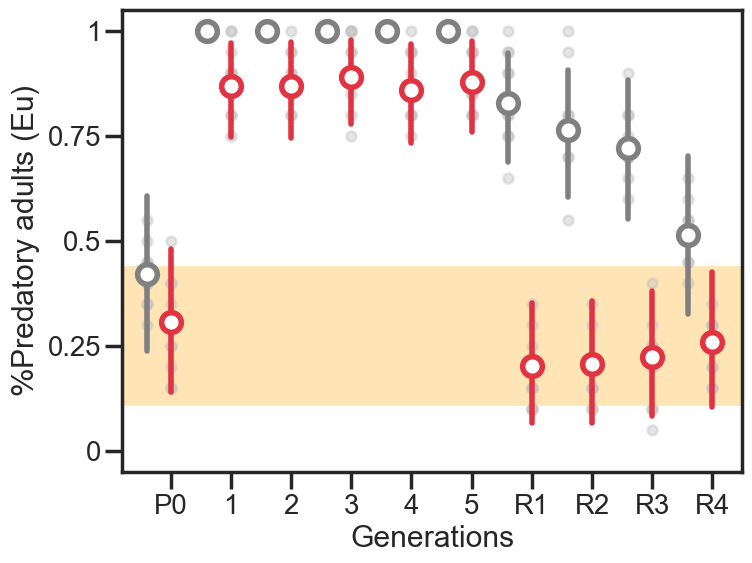

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

col=sns.color_palette("tab10")[0]
col2 = sns.color_palette("rocket_r")[-4]

count = 1
for i in ebax_tu1754_F5Rev.columns:
    y = np.array(ebax_tu1754_F5Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    inf_summ = az.summary(ebax_tu1754_F5Rev_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5) 
    if count == 1:
        y = np.array(WT_F5Rev['F0'])/20.
        plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
        inf_summ = az.summary(WT_F5Rev_inf['P0'], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        y = np.array(WT_F5Rev[i])/20.
        if np.mean(y) == 1:
            plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
        else:
            plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
            inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
            inf_mean = np.array(inf_summ['mean'][2:])
            l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
            h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
            plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
            plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    
    count += 1

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 11, 1), 
       xticklabels=['P0', 1, 2, 3, 4, 5,  'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.2, 10.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3D

In [33]:
WT_F10Rev = pd.read_excel("./raw_data/WT_F10Rev.xlsx", index_col=0)
file = open("./stat_inf/WT_F10Rev_inf.pickle",'rb')
WT_F10Rev_inf = pickle.load(file)
WT_F10Rev = WT_F10Rev.rename(columns={'R11': 'R1', 'R12': 'R2', 'R13': 'R3', 'R14': 'R4', 'R15': 'R5'})

In [34]:
ebax_tu1754_F10Rev = pd.read_excel("./raw_data/ebax-tu1754-F10Rev.xlsx", index_col=0)
file = open("./stat_inf/ebax_tu1754_F10Rev_inf.pickle",'rb')
ebax_tu1754_F10Rev_inf = pickle.load(file)

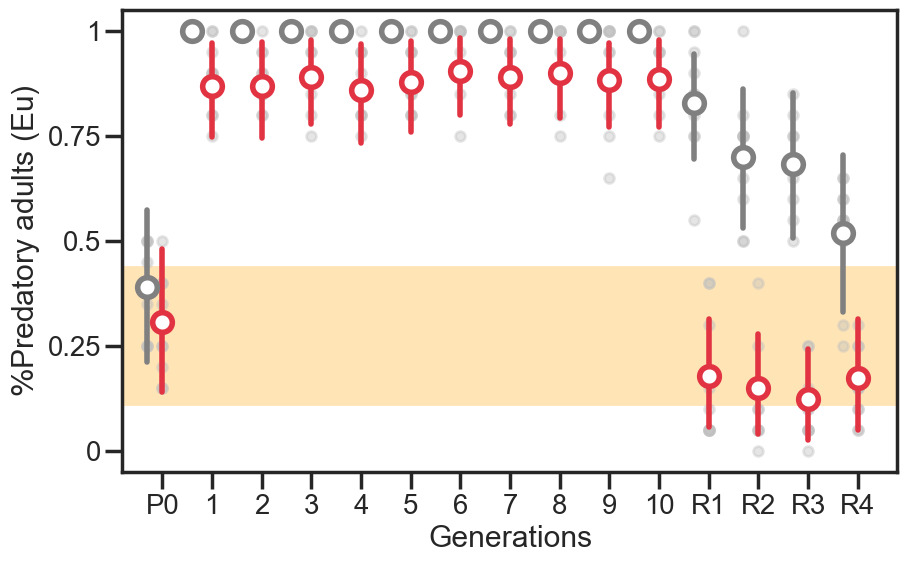

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

col=sns.color_palette("tab10")[0]
col2 = sns.color_palette("rocket_r")[-4]

count = 1
for i in ebax_tu1754_F10Rev.columns:
    y = np.array(ebax_tu1754_F10Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    inf_summ = az.summary(ebax_tu1754_F10Rev_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)    
    if count == 1 or count > 11:
        y = np.array(WT_F10Rev[i])/20.
        plt.scatter([count-0.3 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
        inf_summ = az.summary(WT_F10Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.3, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.3, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        y = np.array(WT_F10Rev[i])/20.
        plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=2)
        
    count += 1

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 16, 1), 
       xticklabels=['P0',  1, 2,  3,  4,  5,  6,  7,  8,  9, 10, 'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.2, 15.8), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3E

In [42]:
hsp90_F5Rev = pd.read_excel("./raw_data/HSP90_F5Rev.xlsx", index_col=0)
file = open("./stat_inf/hsp90_F5Rev_inf.pickle",'rb')
hsp90_F5Rev_inf = pickle.load(file)

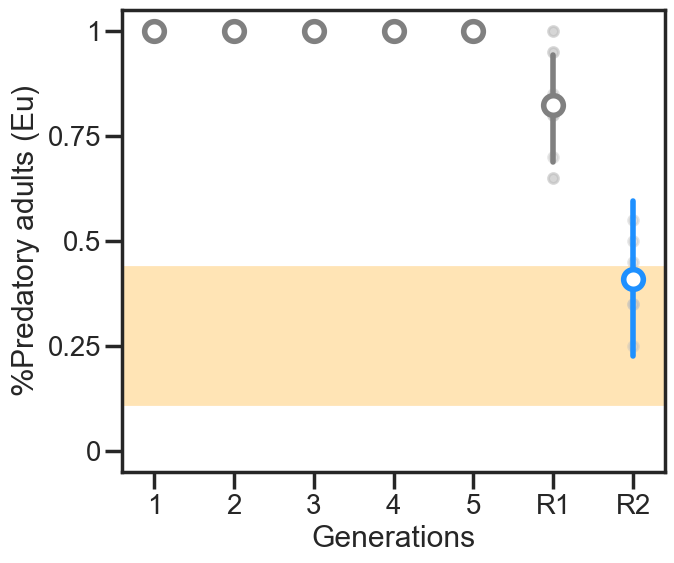

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))

col='dodgerblue'

count = 1
for i in hsp90_F5Rev.columns:
    y = np.array(hsp90_F5Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if count < 6:
        plt.scatter(count, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1
    
inf_summ = az.summary(hsp90_F5Rev_inf['R1'], hdi_prob=0.95)
inf_mean = np.array(inf_summ['mean'][2:])
l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
plt.vlines(6, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
plt.scatter(6, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)

inf_summ = az.summary(hsp90_F5Rev_inf['R2'], hdi_prob=0.95)
inf_mean = np.array(inf_summ['mean'][2:])
l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
plt.vlines(7, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
plt.scatter(7, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

    
ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 7, 7), 
       xticklabels=[ 1,  2,  3,  4,  5, 'R1', 'R2'], xlim=(0.6, 7.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3F

In [54]:
hsp90_F10Rev = pd.read_excel("./raw_data/HSP90_F10Rev.xlsx", index_col=0)
file = open("./stat_inf/hsp90_F10Rev_inf.pickle",'rb')
hsp90_F10Rev_inf = pickle.load(file)

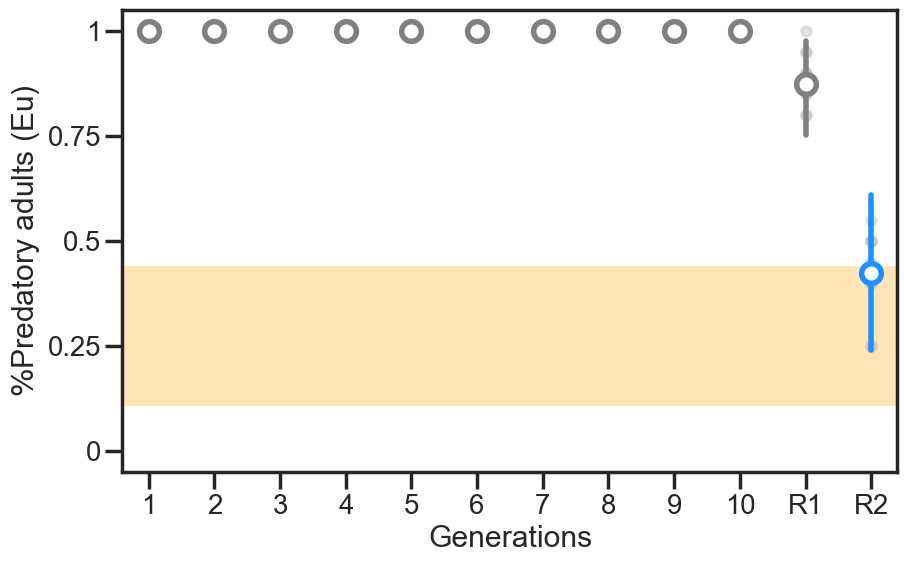

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

col='dodgerblue'

count = 1
for i in hsp90_F10Rev.columns:
    y = np.array(hsp90_F10Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if count < 11:
        plt.scatter(count, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1
    
inf_summ = az.summary(hsp90_F10Rev_inf['R1'], hdi_prob=0.95)
inf_mean = np.array(inf_summ['mean'][2:])
l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
plt.vlines(11, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
plt.scatter(11, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)

inf_summ = az.summary(hsp90_F10Rev_inf['R2'], hdi_prob=0.95)
inf_mean = np.array(inf_summ['mean'][2:])
l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
plt.vlines(12, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
plt.scatter(12, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

    
ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 12, 12), xticklabels=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 'R1', 'R2'], xlim=(0.6, 12.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3G

In [57]:
DMSO_control = pd.read_excel("./raw_data/DMSO_control.xlsx", index_col=0)
file = open("./stat_inf/DMSO_control_inf.pickle",'rb')
DMSO_control_inf = pickle.load(file)

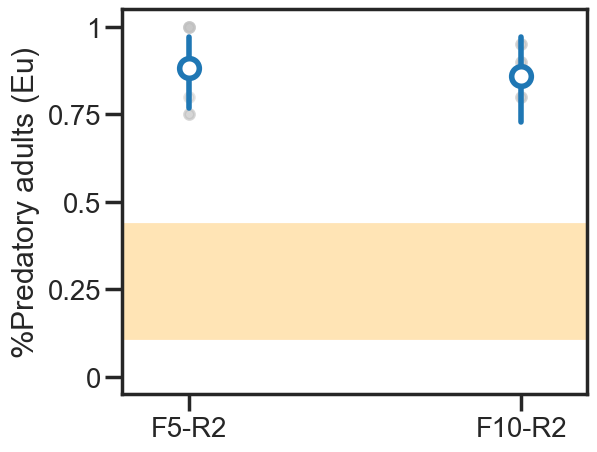

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

col=sns.color_palette("tab10")[0]

count = 1
for i in DMSO_control.columns:
    inf_summ = az.summary(DMSO_control_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(DMSO_control[i])
    y = y[~np.isnan(y)]/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1
    
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='', ylim=(-0.05, 1.05), xticks=np.linspace(1, 2, 2), xticklabels=[r'F5-R2', r'F10-R2'],  xlim=(0.8, 2.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 5D

In [4]:
WT_F1Rev= pd.read_excel('./raw_data/WT_F1Rev.xlsx')
mir2= pd.read_excel('./raw_data/tuDf9_F1Rev.xlsx', index_col=0)
mir1= pd.read_excel('./raw_data/tuDf10_F1Rev.xlsx',index_col=0)
mir0= pd.read_excel('./raw_data/tuDf11_F1Rev.xlsx',index_col=0)
file = open("./stat_inf/WT_F1Rev_inf.pickle",'rb')
WT_F1Rev_inf = pickle.load(file)
file = open("./stat_inf/mir2_inf.pickle",'rb')
mir2_inf = pickle.load(file)
file = open("./stat_inf/mir1_inf.pickle",'rb')
mir1_inf = pickle.load(file)
file = open("./stat_inf/mir0_inf.pickle",'rb')
mir0_inf = pickle.load(file)

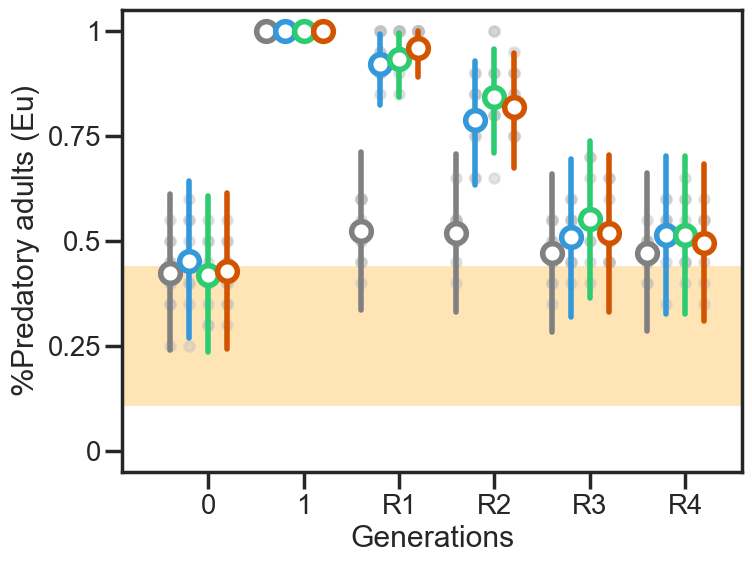

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

col='#3498DB'
col1= '#2ECC71'
col2= '#D35400'

count = 1
for i in WT_F1Rev.columns[1:]:
    y = np.array(WT_F1Rev[i])/20.
    ax.scatter([count - 0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(WT_F1Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir2.columns:
    y = np.array(mir2[i])/20.
    ax.scatter([count - 0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir2_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.2, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.2, np.mean(y), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir1.columns:
    y = np.array(mir1[i])/20.
    ax.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir1_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col1, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count, np.mean(y), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir0.columns:
    y = np.array(mir0[i])/20.
    ax.scatter([count+0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir0_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count+0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count+0.2, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count+0.2, np.mean(y), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    count += 1

col = 'moccasin'
x = np.linspace(-0.5, 7)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 7, 1), 
       xticklabels=[0, 1,  'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.1, 6.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 5E

In [64]:
WT_F3Rev= pd.read_excel('./raw_data/WT_F3Rev.xlsx')
mir2_F3= pd.read_excel('./raw_data/tuDf9_F3Rev.xlsx', index_col=0)
mir1_F3= pd.read_excel('./raw_data/tuDf10_F3Rev.xlsx',index_col=0)
mir0_F3= pd.read_excel('./raw_data/tuDf11_F3Rev.xlsx',index_col=0)
file = open("./stat_inf/WT_F3Rev_inf.pickle",'rb')
WT_F3Rev_inf = pickle.load(file)
file = open("./stat_inf/mir2_F3_inf.pickle",'rb')
mir2_F3_inf = pickle.load(file)
file = open("./stat_inf/mir1_F3_inf.pickle",'rb')
mir1_F3_inf = pickle.load(file)
file = open("./stat_inf/mir0_F3_inf.pickle",'rb')
mir0_F3_inf = pickle.load(file)

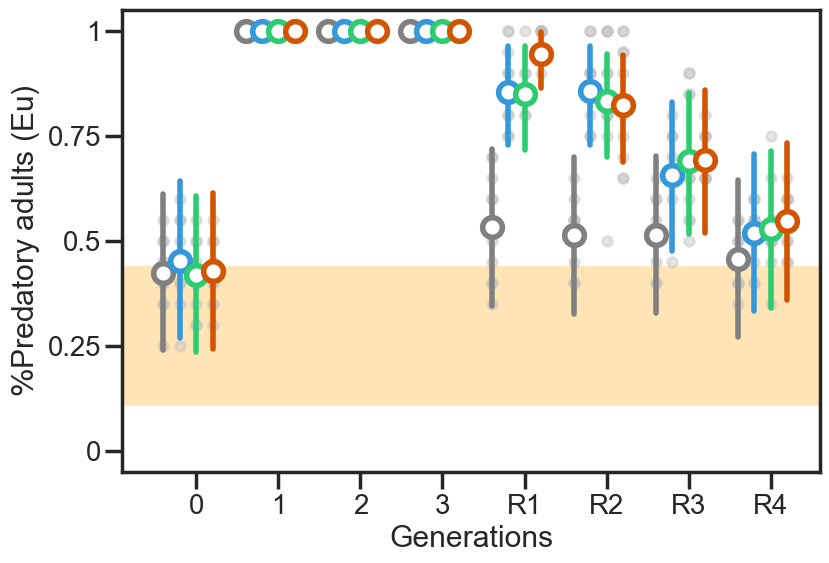

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))

col='#3498DB'
col1= '#2ECC71'
col2= '#D35400'

count = 1
for i in WT_F3Rev.columns[1:]:
    y = np.array(WT_F3Rev[i])/20.
    ax.scatter([count - 0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(WT_F3Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir2_F3.columns:
    y = np.array(mir2_F3[i])/20.
    ax.scatter([count - 0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir2_F3_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.2, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.2, np.mean(y), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir1_F3.columns:
    y = np.array(mir1_F3[i])/20.
    ax.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir1_F3_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col1, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count, np.mean(y), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir0_F3.columns:
    y = np.array(mir0_F3[i])/20.
    ax.scatter([count+0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir0_F3_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count+0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count+0.2, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count+0.2, np.mean(y), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    count += 1

col = 'moccasin'
x = np.linspace(-0.5, 9)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 9, 1), 
       xticklabels=[0, 1, 2, 3, 'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.1, 8.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 5F

In [82]:
WT_F5Rev= pd.read_excel('./raw_data/WT_F5Rev.xlsx', index_col=0)
mir2_F5= pd.read_excel('./raw_data/tuDf9_F5Rev.xlsx', index_col=0)
mir1_F5= pd.read_excel('./raw_data/tuDf10_F5Rev.xlsx',index_col=0)
mir0_F5= pd.read_excel('./raw_data/tuDf11_F5Rev.xlsx',index_col=0)

In [108]:
file = open("./stat_inf/WT_F5Rev_inf.pickle",'rb')
WT_F5Rev_inf = pickle.load(file)
file = open("./stat_inf/mir2_F5_inf.pickle",'rb')
mir2_F5_inf = pickle.load(file)
file = open("./stat_inf/mir1_F5_inf.pickle",'rb')
mir1_F5_inf = pickle.load(file)
file = open("./stat_inf/mir0_F5_inf.pickle",'rb')
mir0_F5_inf = pickle.load(file)

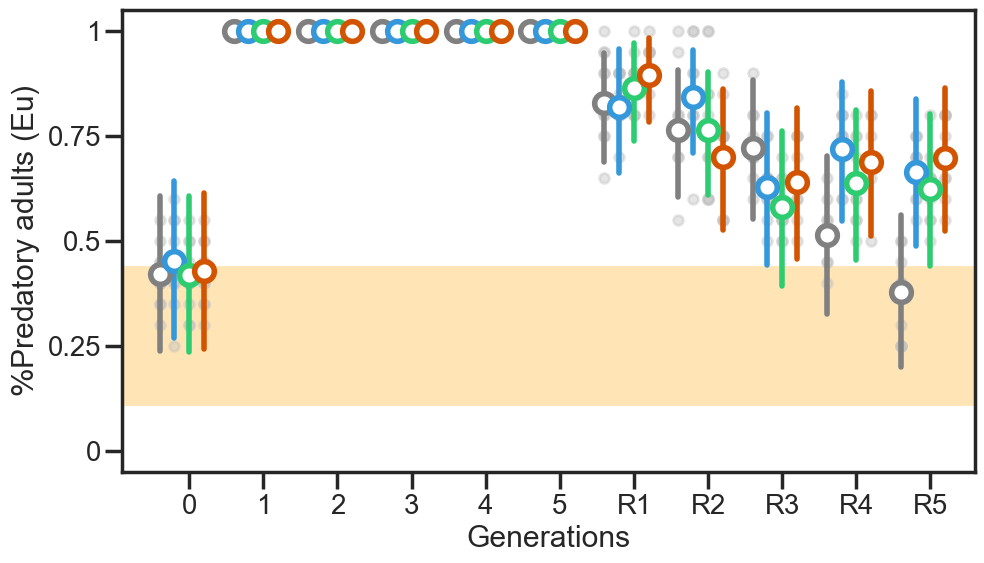

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(11,6))

col='#3498DB'
col1= '#2ECC71'
col2= '#D35400'

count = 1
for i in WT_F5Rev.columns[:-2]:
    y = np.array(WT_F5Rev[i])/20.
    ax.scatter([count - 0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if i=='F0':
        i ='P0'
    if np.mean(y) != 1:
        inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir2_F5.columns:
    y = np.array(mir2_F5[i])/20.
    ax.scatter([count - 0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir2_F5_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.2, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.2, np.mean(y), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir1_F5.columns:
    y = np.array(mir1_F5[i])/20.
    ax.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir1_F5_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col1, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count, np.mean(y), s=200, edgecolors=col1, color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in mir0_F5.columns:
    y = np.array(mir0_F5[i])/20.
    ax.scatter([count+0.2 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(mir0_F5_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count+0.2, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count+0.2, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count+0.2, np.mean(y), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5)
    count += 1

col = 'moccasin'
x = np.linspace(-0.5, 14)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 12, 1), 
       xticklabels=[0, 1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'],
       ylim=(-0.05, 1.05), xlim=(0.1, 11.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

# Supplementary figures

## Figure S1-C

In [4]:
df_f35 = pd.read_excel("./raw_data/F35_reversal.xlsx", index_col=0)

In [5]:
file = open("./stat_inf/R35_HM.pickle",'rb')
stat_inf_R35  = pickle.load(file)

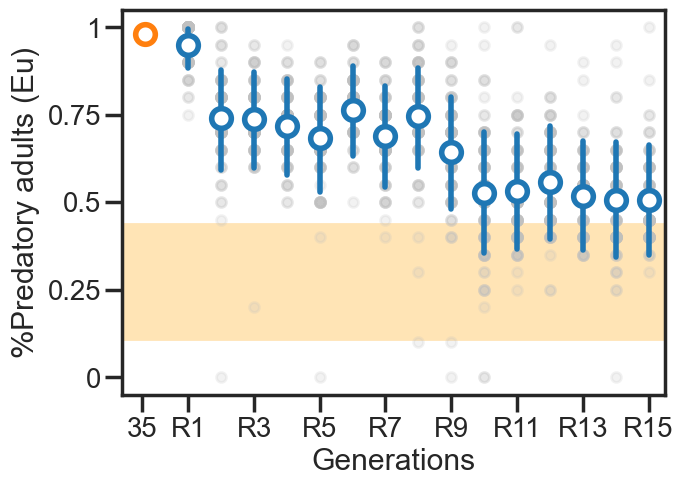

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f35.columns:
    inf_summ = az.summary(stat_inf_R35[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f35[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['35'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-D

In [7]:
df_f45 = pd.read_excel("./raw_data/F45_reversal.xlsx", index_col=0)
file = open("./stat_inf/R45_HM.pickle",'rb')
stat_inf_R45  = pickle.load(file)

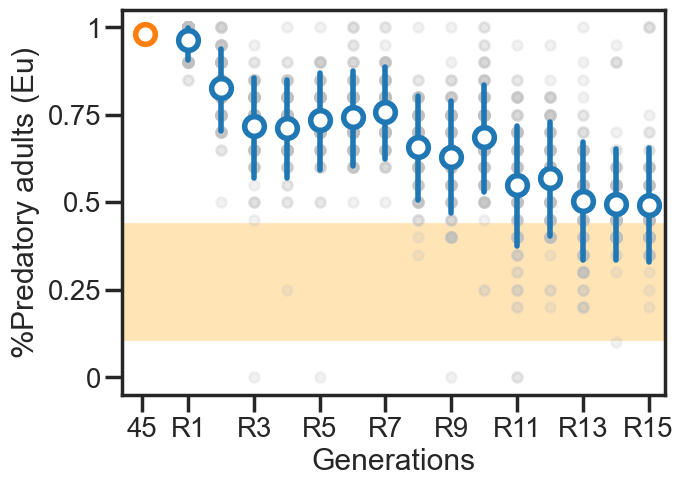

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f45.columns:
    inf_summ = az.summary(stat_inf_R45[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f45[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', 
       ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['45'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-E

In [9]:
df_f55 = pd.read_excel("./raw_data/F55_reversal.xlsx", index_col=0)
file = open("./stat_inf/R55_HM.pickle",'rb')
stat_inf_R55  = pickle.load(file)

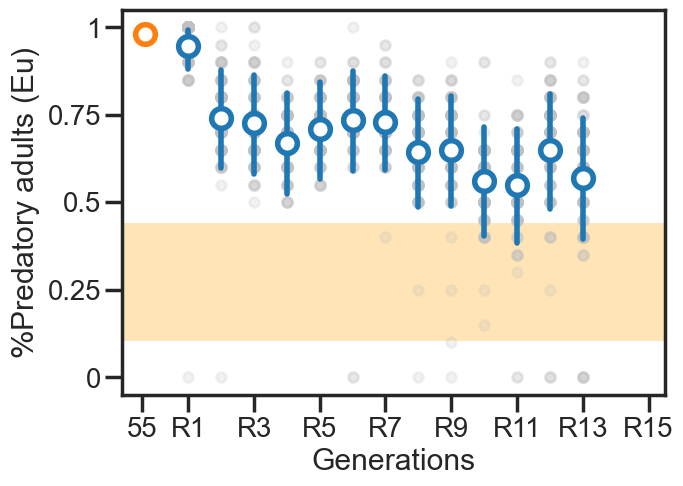

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f55.columns:
    inf_summ = az.summary(stat_inf_R55[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f55[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['55'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-F

In [11]:
df_f65 = pd.read_excel("./raw_data/F65_reversal.xlsx", index_col=0)
file = open("./stat_inf/R65_HM.pickle",'rb')
stat_inf_R65  = pickle.load(file)

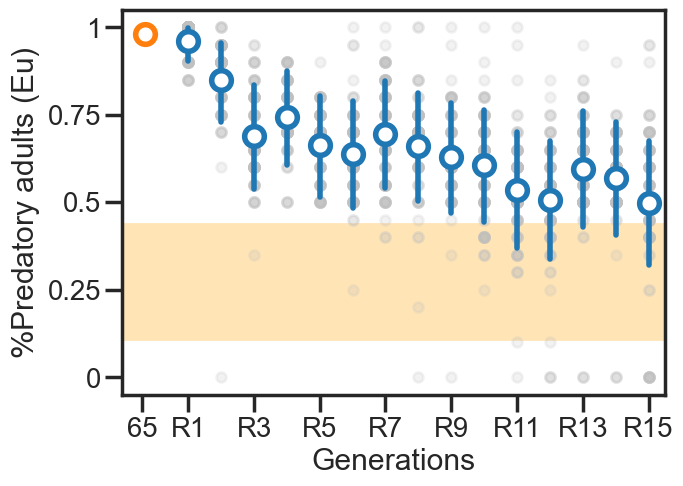

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f65.columns:
    inf_summ = az.summary(stat_inf_R65[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f65[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['65'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-G

In [13]:
df_f75 = pd.read_excel("./raw_data/F75_reversal.xlsx", index_col=0)
file = open("./stat_inf/R75_HM.pickle",'rb')
stat_inf_R75  = pickle.load(file)

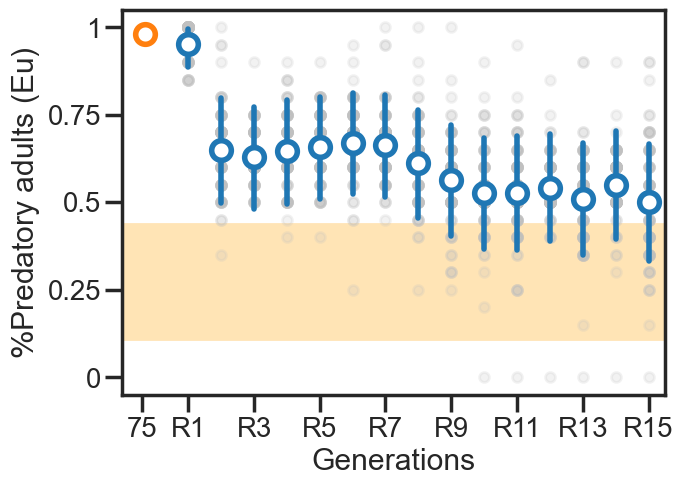

In [14]:

fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f75.columns:
    inf_summ = az.summary(stat_inf_R75[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f75[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['75'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-H

In [15]:
df_f85 = pd.read_excel("./raw_data/F85_reversal.xlsx", index_col=0)
file = open("./stat_inf/R85_HM.pickle",'rb')
stat_inf_R85  = pickle.load(file)

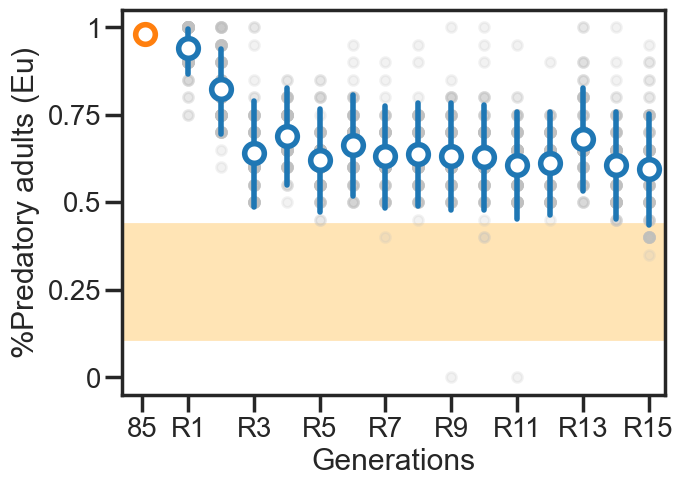

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f85.columns:
    inf_summ = az.summary(stat_inf_R85[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f85[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['85'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S1-I

In [17]:
df_f95 = pd.read_excel("./raw_data/F95_reversal.xlsx", index_col=0)
file = open("./stat_inf/R95_HM.pickle",'rb')
stat_inf_R95  = pickle.load(file)

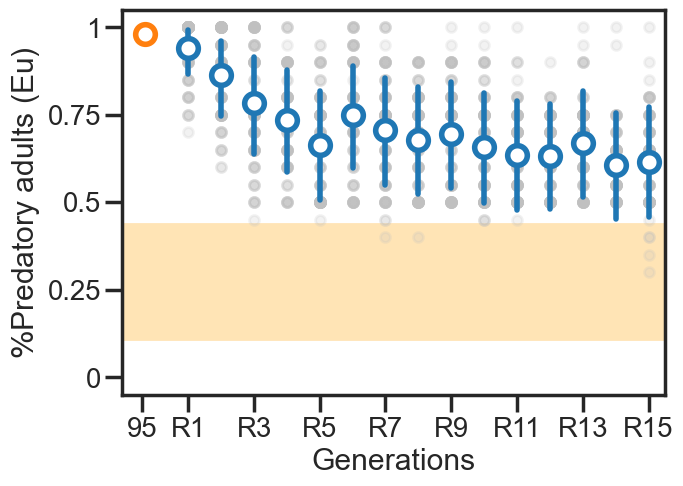

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

plt.scatter(-0.3, 0.98, s=200, edgecolors=sns.color_palette("tab10")[1], color='white', linewidths=4, zorder=2)

count = 1
for i in df_f95.columns:
    inf_summ = az.summary(stat_inf_R95[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(df_f95[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.array([-0.4,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]), 
       xticklabels=['95'] + ['R'+str(int(i)) for i in np.linspace(1, 15, 8)], xlim=(-1, 15.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

# Figure S1-J

In [19]:
kana = pd.read_excel('./raw_data/kana_response.xlsx')

In [21]:
file = open("./stat_inf/kana_inf.pickle",'rb')
kana_inf  = pickle.load(file)

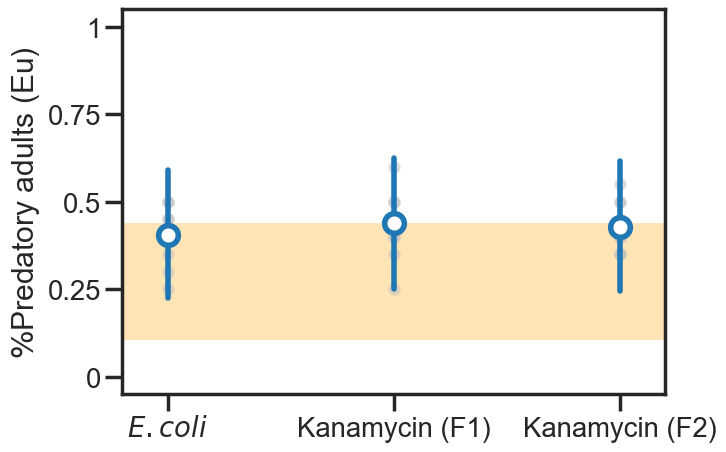

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]

count = 1
for i in kana.columns:
    inf_summ = az.summary(kana_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(kana[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1
    
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='', ylim=(-0.05, 1.05), xticks=np.linspace(1, 3, 3), 
       xticklabels=[r'$\it{E. coli}$', r'Kanamycin (F1)', r'Kanamycin (F2)'],  xlim=(0.8, 3.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S3-I

In [27]:
WT_F5Rev = pd.read_excel("./raw_data/WT_F5rev.xlsx", index_col=0)
file = open("./stat_inf/WT_F5Rev_inf.pickle",'rb')
WT_F5Rev_inf = pickle.load(file)

In [29]:
ebax_tu1755_F5Rev =pd.read_excel('./raw_data/ebax-tu1755-F5Rev.xlsx')

In [30]:
file = open("./stat_inf/ebax_tu1755_F5Rev_inf.pickle",'rb')
ebax_tu1755_F5Rev_inf  = pickle.load(file)

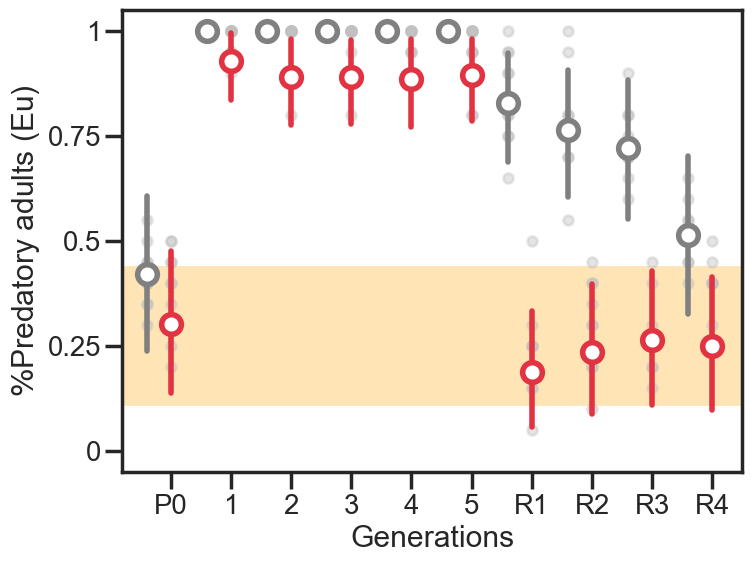

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

col=sns.color_palette("tab10")[0]
col2 = sns.color_palette("rocket_r")[-4]

count = 1
for i in ebax_tu1755_F5Rev.columns:
    y = np.array(ebax_tu1756_F5Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    inf_summ = az.summary(ebax_tu1755_F5Rev_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5) 
    if count == 1:
        y = np.array(WT_F5Rev['F0'])/20.
        plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
        inf_summ = az.summary(WT_F5Rev_inf['P0'], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        y = np.array(WT_F5Rev[i])/20.
        if np.mean(y) == 1:
            plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
        else:
            plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
            inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
            inf_mean = np.array(inf_summ['mean'][2:])
            l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
            h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
            plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
            plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    
    count += 1

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 11, 1), 
       xticklabels=['P0', 1, 2, 3, 4, 5,  'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.2, 10.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure S3-J

In [23]:
ebax_tu1756_F5Rev =pd.read_excel('./raw_data/ebax-tu1756-F5Rev.xlsx')

In [25]:
file = open("./stat_inf/ebax_tu1756_F5Rev_inf.pickle",'rb')
ebax_tu1756_F5Rev_inf  = pickle.load(file)

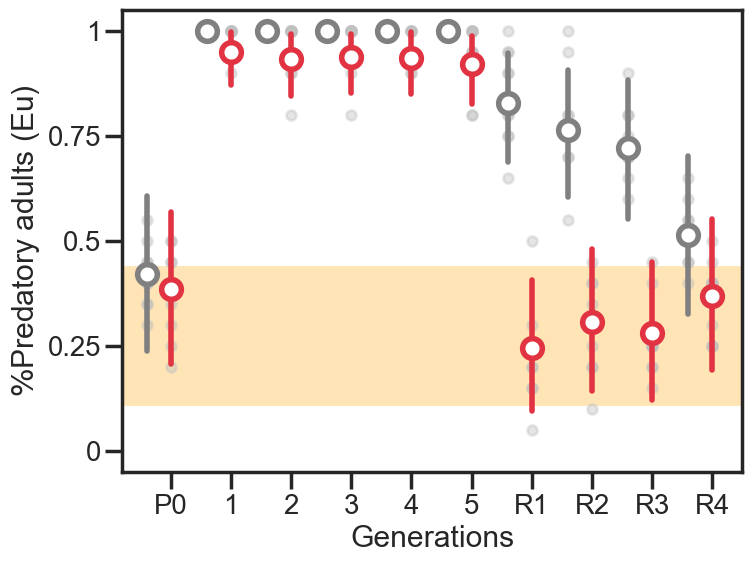

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

col=sns.color_palette("tab10")[0]
col2 = sns.color_palette("rocket_r")[-4]

count = 1
for i in ebax_tu1756_F5Rev.columns:
    y = np.array(ebax_tu1756_F5Rev[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    inf_summ = az.summary(ebax_tu1756_F5Rev_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col2, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col2, color='white', linewidths=4, zorder=5) 
    if count == 1:
        y = np.array(WT_F5Rev['F0'])/20.
        plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
        inf_summ = az.summary(WT_F5Rev_inf['P0'], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        y = np.array(WT_F5Rev[i])/20.
        if np.mean(y) == 1:
            plt.scatter(count-0.4, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
        else:
            plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
            inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
            inf_mean = np.array(inf_summ['mean'][2:])
            l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
            h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
            plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
            plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    
    count += 1

col = 'moccasin'
x = np.linspace(0., 22, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 11, 1), 
       xticklabels=['P0', 1, 2, 3, 4, 5,  'R1', 'R2', 'R3', 'R4'],
       ylim=(-0.05, 1.05), xlim=(0.2, 10.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);